In [2]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 

# Loading data 
irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train) 

# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


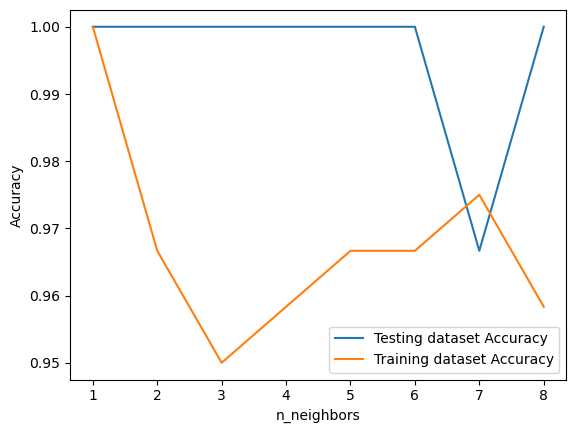

In [3]:
# Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

irisData = load_iris() 

# Create feature and target arrays 
X = irisData.data 
y = irisData.target 

# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
			X, y, test_size = 0.2, random_state=42) 

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute training and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [4]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
#Extracting Independent & dependant variables
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(y_test, y_pred))

Accuracy= 0.93


C:\Users\Admin\AppData\Local\Temp\ipykernel_17108\2660365228.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


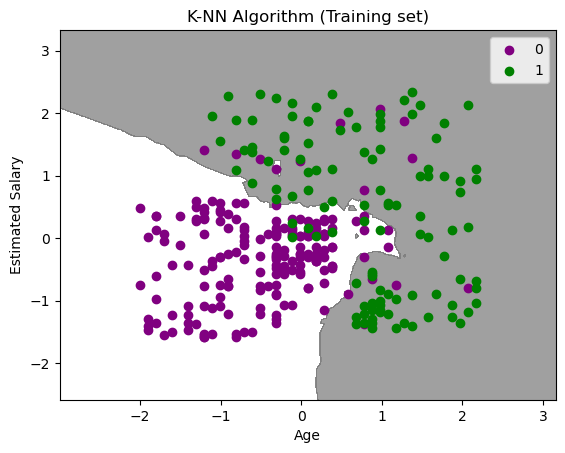

In [14]:
# Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set,y_set=X_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('white','gray')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('purple','green'))(i), label=j)
plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17108\1444412796.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


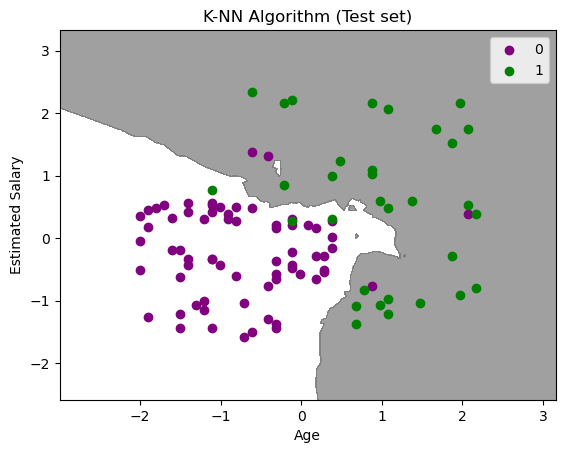

In [15]:
# Visualizing the testing set result
from matplotlib.colors import ListedColormap
x_set,y_set=X_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('white','gray')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('purple','green'))(i), label=j)
plt.title('K-NN Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()